In [1]:
import xarray as xr 
import xesmf as xe
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os

from scipy.signal import butter, lfilter
from scipy.signal import convolve

import utilities

import importlib
def reimport_module(module_name):
    """
    Reimports the specified Python module.
    
    Args:
    module_name (module): The module to be reimported, typically passed as a variable.
    
    Returns:
    module: The reloaded module.
    """
    try:
        # Reload the already imported module
        reloaded_module = importlib.reload(module_name)
        print(f"Module {module_name.__name__} reloaded successfully.")
        return reloaded_module
    except Exception as e:
        print(f"Failed to reload module: {e}")

reimport_module(utilities)

Module utilities reloaded successfully.


<module 'utilities' from '/glade/work/wchapman/CMJO_Diagnostics_Tool/utilities.py'>

## Settings:

In [2]:
dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts/'
f_in = '/glade/campaign/cgd/amp/wchapman/Reanalysis/ERA5_uvolr/1deg/ERA5_U_V_TTR_1950_2022.nc'
var_name = 'V850'
# file_path = os.path.join(dir_in, f_in)  # Join the directory and file name
DS = xr.open_dataset(f_in)
yrst = 1979
yren = 1993
DS = DS.sel(time=slice(str(yrst),str(yren)))

In [12]:
def regrid_(inBIG,method='bilinear',level=None):
    """
    Regrid the input variable from a list of files to a predefined grid.

    Parameters:
    - file_list (list): List of input files.
    - varin (str): Input variable name.
    - varout (str): Output variable name.
    - method (str): Resampling method (default is 'bilinear').
    - level (str, optional): Vertical level to select (default is None).

    Returns:
    - xr.Dataset: Regridded dataset.
    """
        
    ds_out = xr.open_dataset('/glade/work/wchapman/miles-rollout/notebooks/gather_global_data/ML_1deg_grid.nc')
    regridder = xe.Regridder(inBIG, ds_out, "bilinear")
    outSMALL = regridder(inBIG)
    return outSMALL

## Regrid!

In [13]:
f_out = f'ERA5.h1.U850.{yrst}010100000-{yren}123100000.nc'
file_path = os.path.join(dir_in, f_out)  # Join the directory and file name
outsmall = regrid_(DS['U'].sel(level=850)).to_dataset(name='U850')
outsmall.to_netcdf(file_path)
print('1')

f_out = f'ERA5.h1.U200.{yrst}010100000-{yren}123100000.nc'
file_path = os.path.join(dir_in, f_out)  # Join the directory and file name
outsmall = regrid_(DS['U'].sel(level=200)).to_dataset(name='U200')
outsmall.to_netcdf(file_path)
print('2')
           
f_out = f'ERA5.h1.V850.{yrst}010100000-{yren}123100000.nc'
file_path = os.path.join(dir_in, f_out)  # Join the directory and file name
outsmall = regrid_(DS['V'].sel(level=850)).to_dataset(name='V850')
outsmall.to_netcdf(file_path)
print('3')

f_out = f'ERA5.h1.V200.{yrst}010100000-{yren}123100000.nc'
file_path = os.path.join(dir_in, f_out)  # Join the directory and file name
outsmall = regrid_(DS['V'].sel(level=200)).to_dataset(name='V200')
outsmall.to_netcdf(file_path)
print('4')

f_out = f'ERA5.h1.FLUT.{yrst}010100000-{yren}123100000.nc'
file_path = os.path.join(dir_in, f_out)  # Join the directory and file name
outsmall = regrid_(DS['TTR']).to_dataset(name='FLUT')
outsmall.to_netcdf(file_path)
print('5')

## Open Daily ERA5 file:

In [2]:
DSera5 = xr.open_dataset('/glade/campaign/cgd/amp/wchapman/Reanalysis/ERA5_uvolr/1deg/ERA5_U_V_TTR_1950_2022.nc')

In [23]:
f_out = f'ERA5.h1.U200.{yrst}010100000-{yren}123100000.nc'
file_path = os.path.join(dir_in, f_out)  # Join the directory and file name
outsmall = regrid_(DS['U'].sel(level=200)).to_dataset(name='U200')

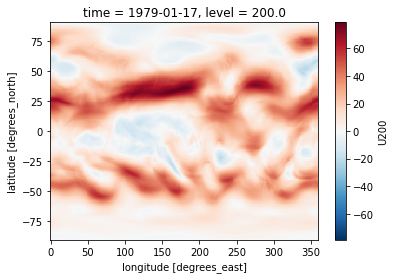

In [30]:
outsmall.isel(time=16)['U200'].plot()